In [1]:
import pandas as pd

churn_df = pd.read_csv('telecom_churn_clean.csv')
churn_df.head(20)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,8,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,9,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)


In [2]:
import numpy as np

X_new = np.array([[30.0, 17.5],
[107.0, 24.1],
[213.0, 10.9]])

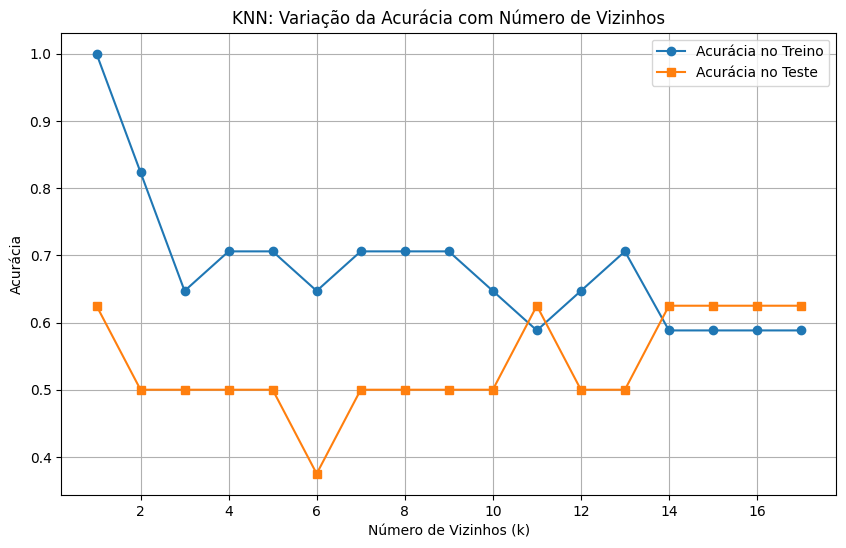

In [9]:
# Corrigido: limitar o número de vizinhos ao tamanho do treino
max_k = len(X_train)
neighbors = range(1, max_k + 1)
train_accuracies = []
test_accuracies = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotando como antes
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label="Acurácia no Treino", marker='o')
plt.plot(neighbors, test_accuracies, label="Acurácia no Teste", marker='s')
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia")
plt.title("KNN: Variação da Acurácia com Número de Vizinhos")
plt.legend()
plt.grid(True)
plt.show()


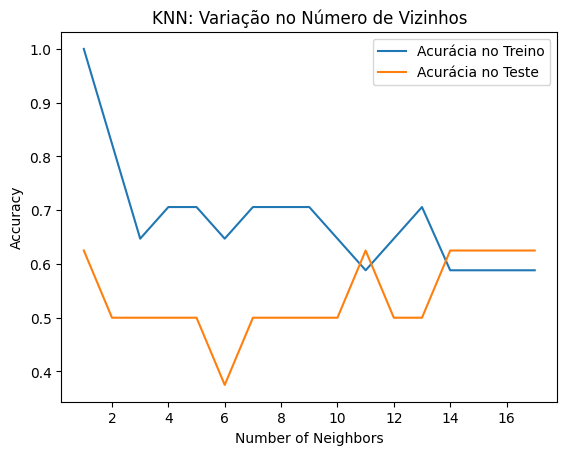

In [12]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Variação no Número de Vizinhos")

plt.plot(neighbors, train_accuracies, label="Acurácia no Treino")
plt.plot(neighbors, test_accuracies, label="Acurácia no Teste")


plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()


In [6]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Criando um DataFrame de exemplo (simulando o arquivo 'telecom_churn_clean.csv')
data = {
    'AccountLength': [100, 120, 130, 90, 110, 140, 150, 160],
    'CustServCalls': [1, 4, 3, 2, 0, 5, 2, 3],
    'DayMins': [300.0, 250.5, 190.3, 210.0, 230.5, 340.2, 280.4, 260.3],
    'EveMins': [200.0, 180.5, 170.0, 160.3, 190.4, 210.2, 200.3, 195.5],
    'IntlMins': [10.0, 12.5, 13.3, 9.0, 11.0, 14.2, 10.5, 13.0],
    'Churn': [0, 1, 0, 0, 0, 1, 0, 1]  # 0 = Não Churn, 1 = Churn
}

churn_df = pd.DataFrame(data)

# Separando variáveis preditoras e alvo
X = churn_df.drop('Churn', axis=1)
y = churn_df['Churn']

# Padronizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=21, stratify=y
)

# Treinando o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))



Acurácia: 1.0

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

